# **Project: Investigate a Dataset (Polish IT job board data from 2022)**

## The data extraction range is from February 2022-November 2022.

#### In this project I will be analyzing economic datasets downloaded from the Kaggler website (https://www.kaggle.com/datasets/kriegsmaschine/polish-it-job-board-data-from-2022) to analyze IT job offers market in Poland, based on the most popular job website. Different variables for measurement will be used, which are:
* Number of bids by experience
* Number of offers in Polish cities
* Main skills based on experience

#### **We will be answering the following questions in our data exploration:**
* In our data mining, we will answer the following questions:
* What is the requirement in the market for employment by experience?
* Which cities have a need for more and which for less experienced workers?
* Which technology is currently most in demand?

#### **Note:**
#### The data extraction range is from February 2022-November 2022.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
# Read the database

jjit = pd.read_csv('/Users/michaladryjanek/Desktop/justjoin.csv')

In [3]:
# Let's look how database looks like
jjit.head()

,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_from_other,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2
0,Senior Frontend Software Engineer,London,GB,javascript,remote,senior,2022-07-31T11:00:14.548Z,True,True,True,...,0,0,unknown,0.176806,React,5,TypeScript,5,unknown,0
1,Sr. Backend Engineer,Berlin,DE,java,remote,senior,2022-07-07T10:25:00.000Z,True,True,True,...,0,0,unknown,0.179577,Kotlin,3,Backend,4,Java,4
2,Sr. Backend Engineer,Katowice,PL,java,remote,senior,2022-05-31T11:32:00.000Z,True,True,True,...,0,0,unknown,0.185871,Kotlin,3,Backend,4,Java,4
3,Sr. Backend Engineer,London,GB,java,remote,senior,2022-05-25T17:06:36.442Z,True,True,True,...,0,0,unknown,0.184581,Kotlin,3,Backend,4,Java,4
4,Python Developer (4 days/week),Białystok,PL,python,remote,mid,2022-06-30T14:57:00.000Z,True,True,False,...,0,0,unknown,0.182969,Flask,3,English,4,Python,4


#### **Initial Observations**

#### We can see the exact date of publication of the announcement. We will isolate the month of publication of the ad to see the number of offers in a particular month on this basis.

In [4]:
# Add month column
jjit['Month_of_Publish'] = jjit['Published_at'].str[5:7]
jjit['Month_of_Publish'] = jjit['Month_of_Publish'].astype('int32')
# Filtering the chart
jjit.filter(items=['Title', 'Experience_level', 'Month_of_Publish'])

,Title,Experience_level,Month_of_Publish
0,Senior Frontend Software Engineer,senior,7
1,Sr. Backend Engineer,senior,7
2,Sr. Backend Engineer,senior,5
3,Sr. Backend Engineer,senior,5
4,Python Developer (4 days/week),mid,6
...,...,...,...
37782,Programista Java,mid,10
37783,Angular Developer,mid,10
37784,Analityk/Projektant,mid,10
37785,Programista Java,mid,10


In [5]:
# Checking how many offers there are in general 
jjit['Month_of_Publish'].value_counts()

4     11997
10     4813
3      4238
5      3988
6      3791
7      3099
8      1947
9      1526
11     1222
2      1166
Name: Month_of_Publish, dtype: int64

In [6]:
# Checking how many bids there are in each experience category
offers = jjit['Experience_level'].value_counts()
offers = pd.DataFrame({'Experience':offers.index, 'Numbers_of_offers':offers.values})
offers

,Experience,Numbers_of_offers
0,mid,20106
1,senior,12458
2,junior,5223


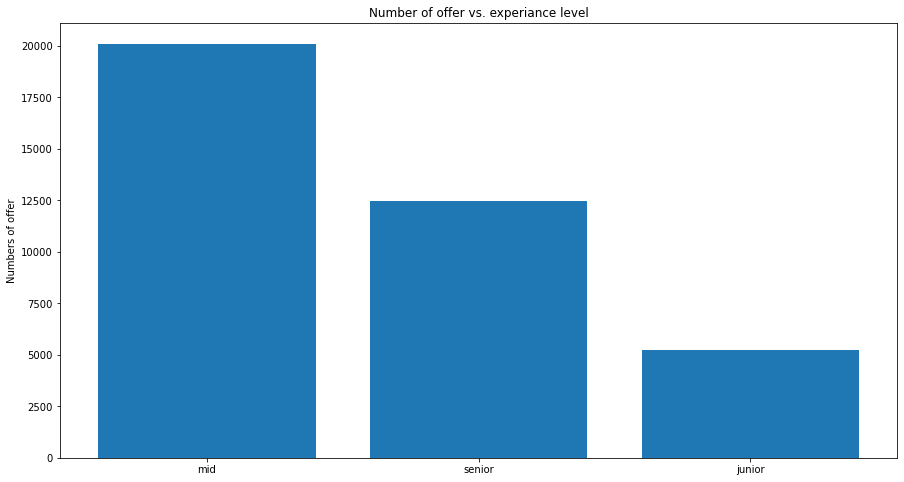

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))


experience_level = offers['Experience']
numbers_of_offers = offers['Numbers_of_offers']


ax.bar(experience_level, numbers_of_offers)

ax.set_ylabel('Numbers of offer')
ax.set_title('Number of offer vs. experiance level')

plt.show()

In [8]:
# Filtering offers based on experiance

JuniorJobs = jjit.Experience_level == "junior"
MidJobs = jjit.Experience_level == "mid"
SeniorJobs = jjit.Experience_level == "senior"

In [23]:
# Counting offers for every month

# junior
junior_number_of_offers = jjit[JuniorJobs]['Month_of_Publish'].value_counts()
junior_number_of_offers = pd.DataFrame({'month_of_pub':junior_number_of_offers.index, 'junior':junior_number_of_offers.values})
# mid
mid_number_of_offers= jjit[MidJobs]['Month_of_Publish'].value_counts() 
mid_number_of_offers = pd.DataFrame({'month_of_pub':mid_number_of_offers.index, 'mid':mid_number_of_offers.values})
#senior
senior_number_of_offers = jjit[SeniorJobs]['Month_of_Publish'].value_counts()
senior_number_of_offers = pd.DataFrame({'month_of_pub':senior_number_of_offers.index, 'senior':senior_number_of_offers.values})

# merge to one silmpy dataframe
js = junior_number_of_offers.merge(mid_number_of_offers)
all = js.merge(senior_number_of_offers).sort_values(by='month_of_pub')
all

,month_of_pub,junior,mid,senior
7,2,160,669,337
2,3,647,2250,1341
0,4,1626,6437,3934
3,5,620,2092,1276
1,6,722,1888,1181
4,7,575,1558,966
6,8,169,1069,709
8,9,157,837,532
5,10,453,2649,1711
9,11,94,657,471


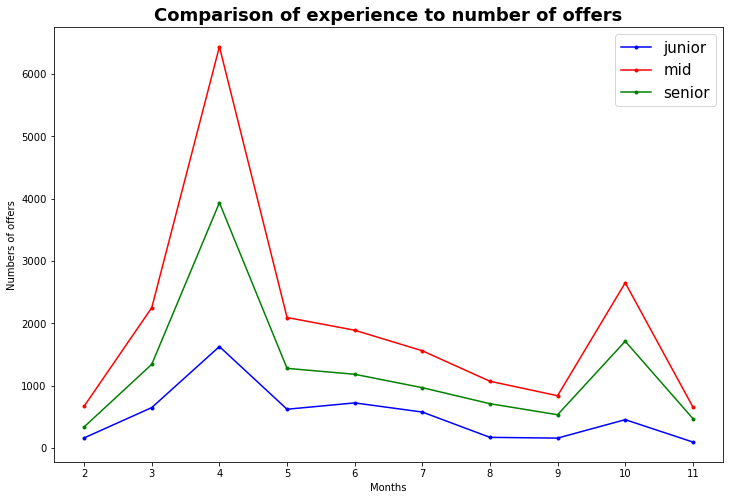

In [24]:
# comparison of experience to number of offers

plt.figure(figsize=(12,8))

plt.title('Comparison of experience to number of offers', fontdict={'fontweight':'bold', 'fontsize': 18})

junior = plt.plot(all.month_of_pub, all.junior, 'b.-', label='junior')
mid = plt.plot(all.month_of_pub, all.mid, 'r.-', label='mid')
senior = plt.plot(all.month_of_pub, all.senior, 'g.-', label='senior')


plt.xticks(all.month_of_pub)


plt.xlabel('Months')
plt.ylabel('Numbers of offers')

plt.legend(fontsize=15)

plt.show()

### Some observation based on database

##### As we can see from the chart, the largest number of job offers in the IT market is for people who have experience at the "mid" level. The number of offers reaches a peak in April after which it successively decreases. In October we could see another increase but not as large as in April.The smallest number of offers appear for people at the "junior" level of experience.  The consequence of this may be even greater demand for employees at the "mid" position. Companies are not willing to hire people without experience.


In [11]:
jjit.head()

,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2,Month_of_Publish
0,Senior Frontend Software Engineer,London,GB,javascript,remote,senior,2022-07-31T11:00:14.548Z,True,True,True,...,0,unknown,0.176806,React,5,TypeScript,5,unknown,0,7
1,Sr. Backend Engineer,Berlin,DE,java,remote,senior,2022-07-07T10:25:00.000Z,True,True,True,...,0,unknown,0.179577,Kotlin,3,Backend,4,Java,4,7
2,Sr. Backend Engineer,Katowice,PL,java,remote,senior,2022-05-31T11:32:00.000Z,True,True,True,...,0,unknown,0.185871,Kotlin,3,Backend,4,Java,4,5
3,Sr. Backend Engineer,London,GB,java,remote,senior,2022-05-25T17:06:36.442Z,True,True,True,...,0,unknown,0.184581,Kotlin,3,Backend,4,Java,4,5
4,Python Developer (4 days/week),Białystok,PL,python,remote,mid,2022-06-30T14:57:00.000Z,True,True,False,...,0,unknown,0.182969,Flask,3,English,4,Python,4,6
